In [1]:
# All imports go here

import numpy as np
import pandas as pd
import seaborn as sns
# Setup Pandas
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 300)
pd.set_option('display.notebook_repr_html', True)
pd.options.display.max_colwidth = 125
# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
df = pd.read_csv('text_emotion.csv')

In [3]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."


In [4]:
df.describe(include='all')

,tweet_id,sentiment,author,content
count,4.000000e+04,40000,40000,40000
unique,NaN,13,33871,39827
top,NaN,neutral,MissxMarisa,I just received a mothers day card from my lovely daughter wishing my a happy mothers day http://tr.im/kWK9
freq,NaN,8638,23,14
mean,1.845184e+09,NaN,NaN,NaN
std,1.188579e+08,NaN,NaN,NaN
min,1.693956e+09,NaN,NaN,NaN
25%,1.751431e+09,NaN,NaN,NaN
50%,1.855443e+09,NaN,NaN,NaN
75%,1.962781e+09,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


## Data Wrangling & Cleaning & Visualization

In [6]:
df.sentiment.value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [7]:
df[df.sentiment == 'happiness'][['sentiment','content']].head(10)

,sentiment,content
40,happiness,mmm much better day... so far! it's still quite early. last day of #uds
69,happiness,"So great to see Oin &amp; Cynthia. So happy. Dinner was great, cute little place. Too bad Oin got sick afterwards."
77,happiness,"@havingmysay dude, that is my favorite sandwich place ever. ummm did you take PICTURES?"
126,happiness,"Need to pack for CALI CALI! Cannot waittt! Thinking a glass of wine is in order to celebrate my weekend vaca. Still work 2morrow, tho."
233,happiness,"took a math test today. The day before the test, the teacher says bring your calculator. Luke was confident. Teacher decided no calcs."
234,happiness,"omg, the concert was awesome, madrigals gave me chills on almost every piece...brooks also called up alumni, but i didnt get to go"
246,happiness,"I Can`t do 30 minutes of Treadmill but done 30 minutes for today already, gonna do 20 minutes more"
250,happiness,Chillin with the roomies. Can't wait for the zombie CLWN CR. Its gonna be 6-8 weeks
293,happiness,@vinylvickxen i kno i doooo!!!!!!!!!! yall partyin with out me
308,happiness,I spilled my beer all over my leg. Wasted half my beer. Home now. I met a cute girl. Good conversation.


In [8]:
df[df.sentiment == 'sadness'][['sentiment','content']].head(10)

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin on your call...
2,sadness,Funeral ceremony...gloomy friday...
6,sadness,"I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!"
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?
12,sadness,Ugh! I have to beat this stupid song to get to the next rude!
13,sadness,@BrodyJenner if u watch the hills in london u will realise what tourture it is because were weeks and weeks late i just watch itonlinelol
15,sadness,The storm is here and the electricity is gone
17,sadness,So sleepy again and it's not even that late. I fail once again.
19,sadness,How are YOU convinced that I have always wanted you? What signals did I give off...damn I think I just lost another friend


In [9]:
df[df.sentiment == 'neutral'][['sentiment','content']].head(10)

,sentiment,content
4,neutral,"@dannycastillo We want to trade with someone who has Houston tickets, but no one will."
10,neutral,cant fall asleep
22,neutral,No Topic Maps talks at the Balisage Markup Conference 2009 Program online at http://tr.im/mL6Z (via @bobdc) #topicmaps
31,neutral,@cynthia_123 i cant sleep
32,neutral,I missed the bl***y bus!!!!!!!!
33,neutral,feels strong contractions but wants to go out. http://plurk.com/p/wxidk
34,neutral,SoCal! stoked. or maybe not.. tomorrow
35,neutral,Screw you @davidbrussee! I only have 3 weeks...
38,neutral,has work this afternoon
39,neutral,@GABBYiSACTiVE Aw you would not unfollow me would you? Then I would cry


In [10]:
df['preCleaningLen'] = [len(t) for t in df.content]

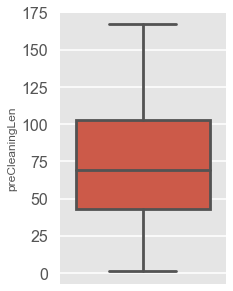

In [11]:
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(3, 5))

sns.boxplot(y=df.preCleaningLen)
plt.show()

In [12]:
df[df.preCleaningLen > 140].head(10)

,tweet_id,sentiment,author,content,preCleaningLen
79,1956985758,worry,jazz_angela,"@shondarhimes Sure you will tweet about this when you're back, but news is abuzz about TR Knight's leaving &quot;confirmed&quot; today. Muy triste.",148
89,1956987950,worry,smiles4dayyz,.. I'm suppposed to be sleep. But i got some much to do. &amp; i got that one part of the song stuck in my head &quot;your a jerk (iknow)&quot; b...,151
371,1957050890,sadness,queenbmakeup,@imjustlalayone damn girl I'm so down but ya gotta let me know so I can get my kit together &amp; I got a flyer Any next weekend? I&quot;M DOWN!,145
635,1957114604,hate,Fiibs,"back at Vienna ( ), sooo tired, luggage lost, Manchester 'd been great - very good outcome from Seminar at MBS &amp; great people around ...",141
660,1957119780,love,johnholdun,"@IkramShahnawaz Oh I love 'em, but when I think about the kind of preservatives they're using to stay &quot;just-baked&quot; it kinda makes me sick",147
879,1957165693,love,shagreenxo,@AnnetteStatus I luv urs! admitting niley with a kiss (: but then they change their minds haha &amp; demi/sterling (: not jemi but still cute,142
1239,1957249164,worry,karinamack,Is feeling really bad about goofin' on @NinaParkerTMZ not knowing she really wasn't at the meeting! Dang I'm sorry! Me &amp; my big 'ol mouth,141
1384,1957291305,anger,msfussybritches,&quot;locked up abroad&quot; makes bein half brown good risk mgmt when travelin 3rd world. i blend. i feel sorry for my hostage magnet white pepo,145
1557,1957339420,love,PaulinePiso,Jus Got Hom Fr. TDa Funeral... I'm So Sad! I Cried So Much Times! Much Love Grandpa!&lt;3 I Never Got To Say My Last &quot;Goodbye&quot; to Him.,144
1622,1957355196,relief,Babii_J,"Bout 2 lay iit down, got a head ache @niariley we hangin tomorrow idont care wat u say lol..soooo dm me ur # &amp; imma hit u tomorrow k ;)",141


In [13]:
df[df.preCleaningLen > 140].content.count()

360

At the time of data scraping, Tweeter only allowed 140 characters to tweet. So there may be some problem on 360 tweets because the length of the tweets are longer than 140.

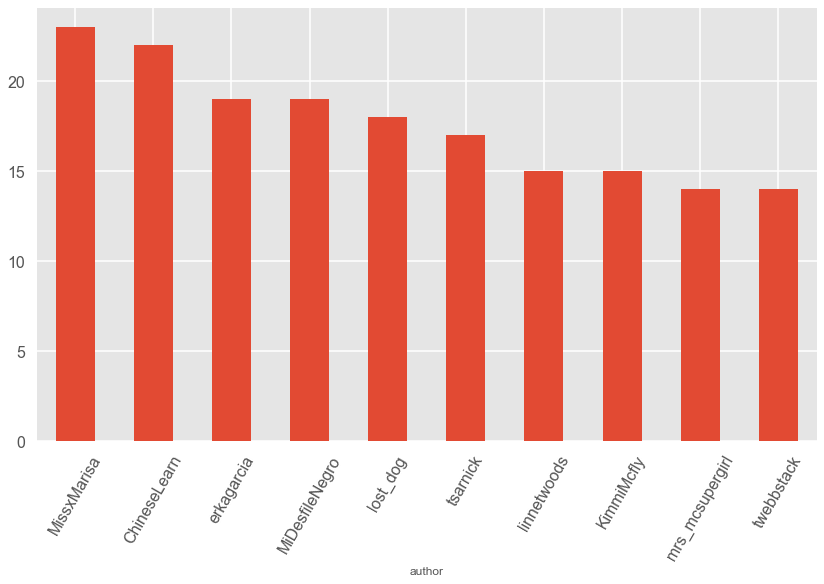

In [14]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(14,8))
df.groupby('author').author.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

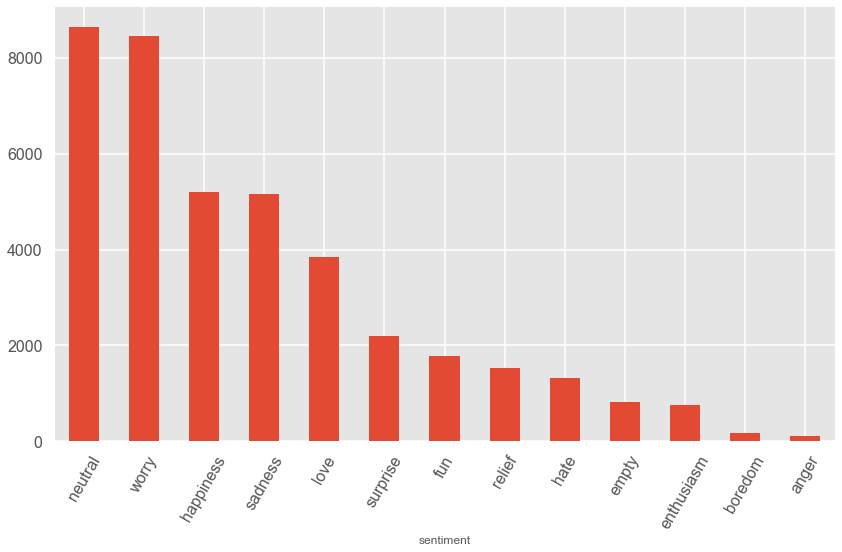

In [15]:
plt.subplots(figsize=(14,8))

df.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

In [16]:
from nltk.tokenize import WordPunctTokenizer
import re
from bs4 import BeautifulSoup



wordpunctok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'

combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        quotRem = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        quotRem = souped
    stripped = re.sub(combined_pat, '', quotRem)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)

    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in wordpunctok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()


df['Cleaned'] = df.content.apply(tweet_cleaner)

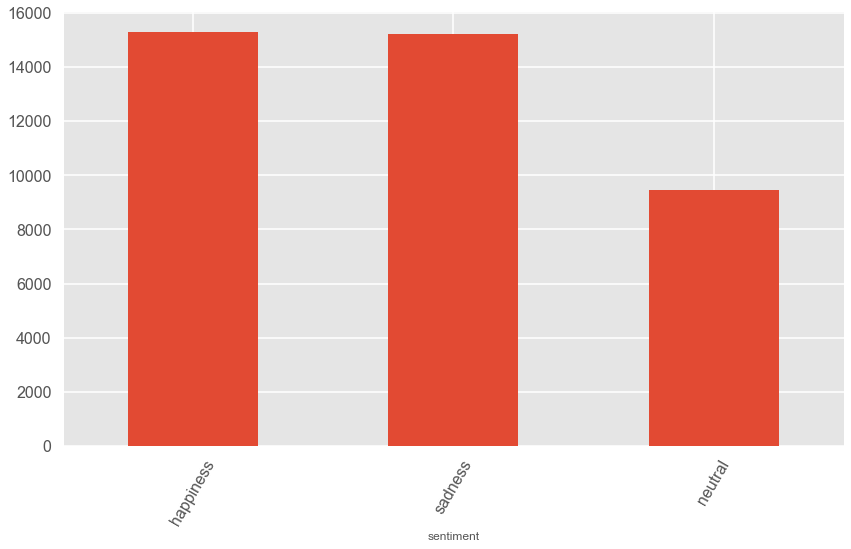

In [17]:
dfRep = df.copy()
dfRep.sentiment.replace(['anger','boredom','enthusiasm','empty','hate','relief','fun','suprise','love','surprise',
                         'worry'],
                    ['worry','sadness','happiness','neutral','sadness','happiness','happiness','happiness',
                     'happiness', 'happiness','sadness'],
                       inplace=True)

plt.subplots(figsize=(14,8))

dfRep.groupby('sentiment')['content'].count().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=60)
plt.show()

## Word Cloud

### Happiness

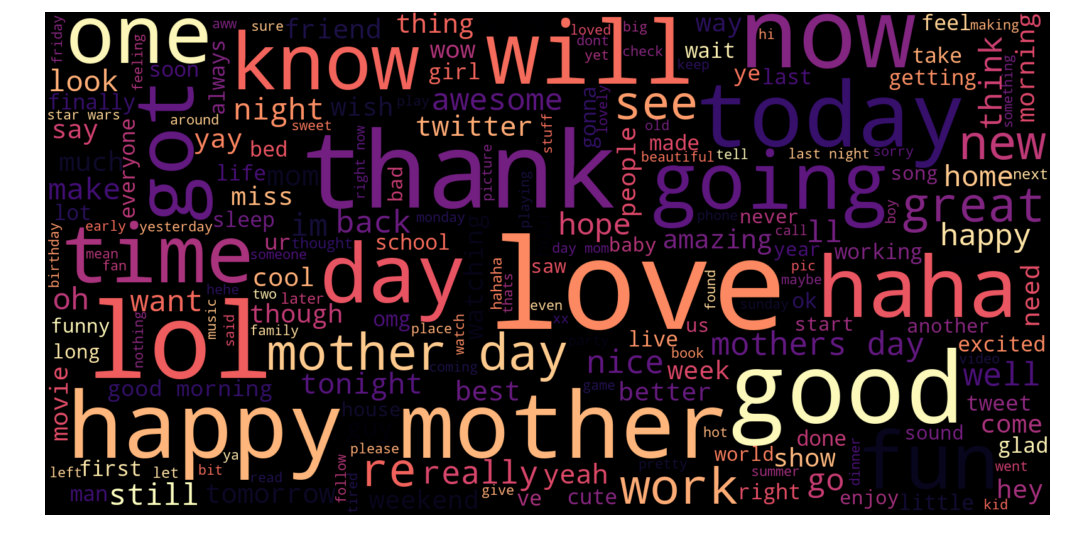

In [18]:
from wordcloud import WordCloud


wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').\
generate(dfRep[dfRep.sentiment=='happiness'].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Sadness

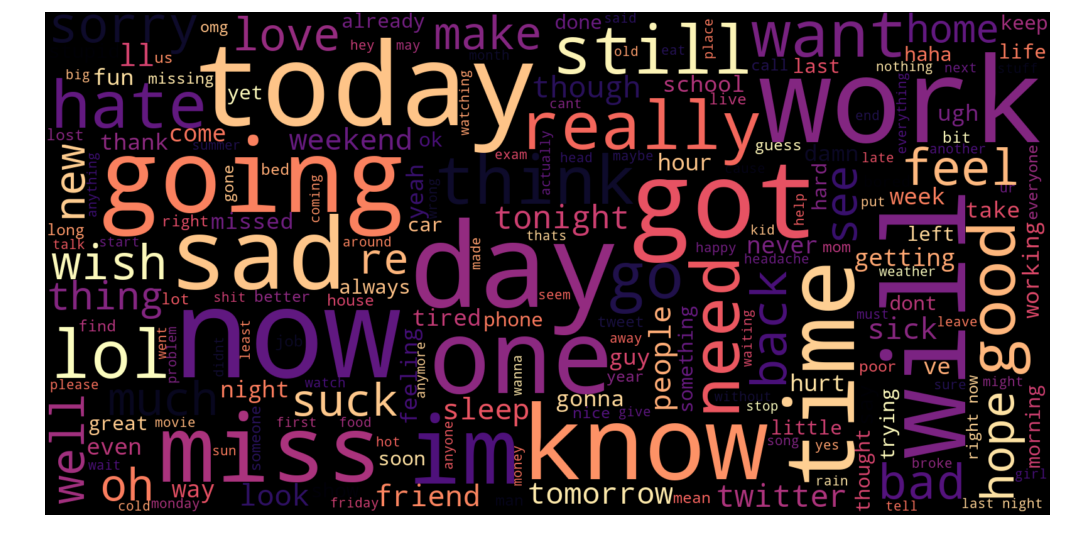

In [19]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').\
generate(dfRep[dfRep.sentiment=='sadness'].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Neutral

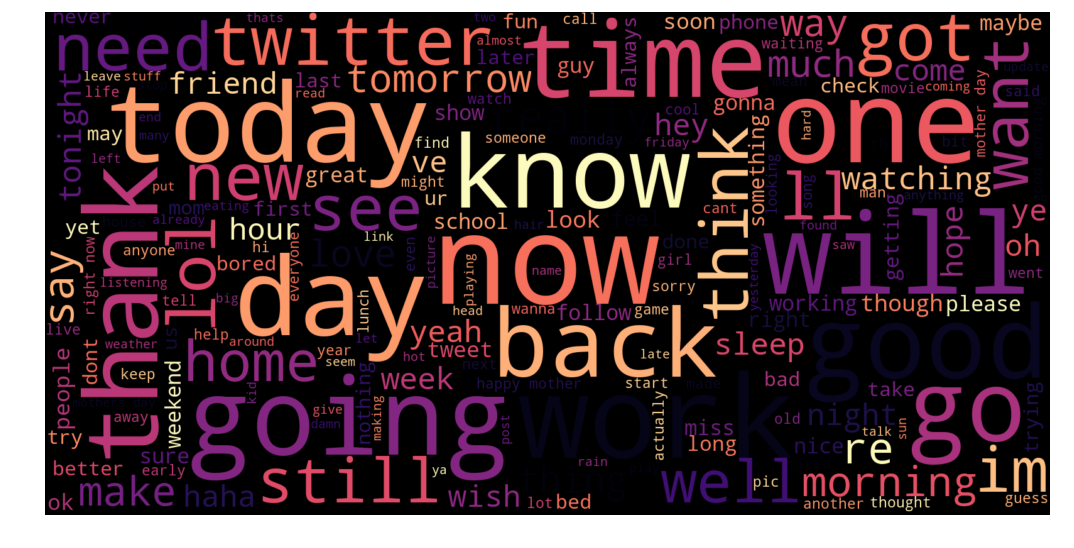

In [20]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').\
generate(dfRep[dfRep.sentiment=='neutral'].Cleaned.str.cat(sep=' '))
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

wordnet_lemmatizer=WordNetLemmatizer()

dfRepCount = dfRep.groupby('sentiment').Cleaned.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(25))
dfRepCount

sentiment
happiness    [(day, 2053), (love, 1298), (good, 1285), (happy, 1167), (mother, 969), (lol, 804), (like, 750), (got, 730), (get, 712), (thanks, 685), (time, 664...
neutral      [(day, 540), (get, 439), (go, 426), (work, 395), (good, 383), (like, 373), (one, 358), (got, 347), (going, 338), (back, 319), (today, 316), (know,...
sadness      [(day, 1105), (get, 993), (go, 883), (work, 869), (like, 855), (got, 789), (today, 718), (going, 664), (good, 641), (sad, 636), (im, 632), (miss, ...
Name: Cleaned, dtype: object

In [22]:
import operator

a = list(map(operator.itemgetter(1), dfRepCount[0]))
b = list(map(operator.itemgetter(0), dfRepCount[0]))

Text(0.5,1,'Top 25 tokens in happy tweets')

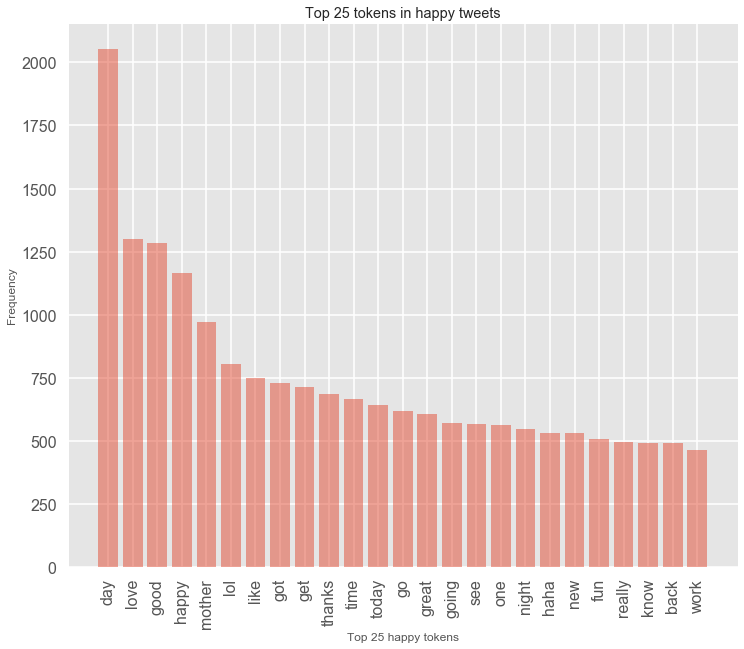

In [23]:
y_pos = np.arange(25)
plt.figure(figsize=(12,10))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, b ,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 25 happy tokens')
plt.title('Top 25 tokens in happy tweets')

Text(0.5,1,'Top 25 tokens in neutral tweets')

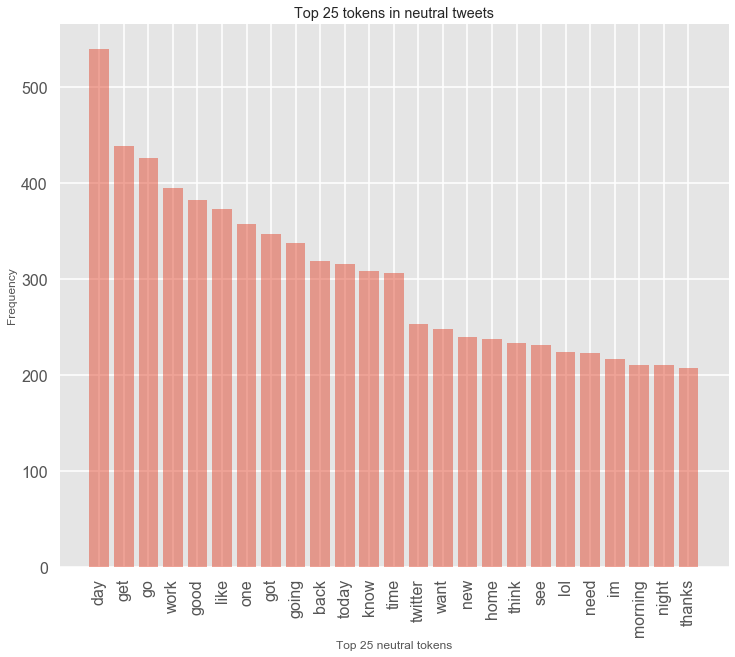

In [24]:
a = list(map(operator.itemgetter(1), dfRepCount[1]))
b = list(map(operator.itemgetter(0), dfRepCount[1]))

y_pos = np.arange(25)
plt.figure(figsize=(12,10))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, b ,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 25 neutral tokens')
plt.title('Top 25 tokens in neutral tweets')

Text(0.5,1,'Top 25 tokens in sad tweets')

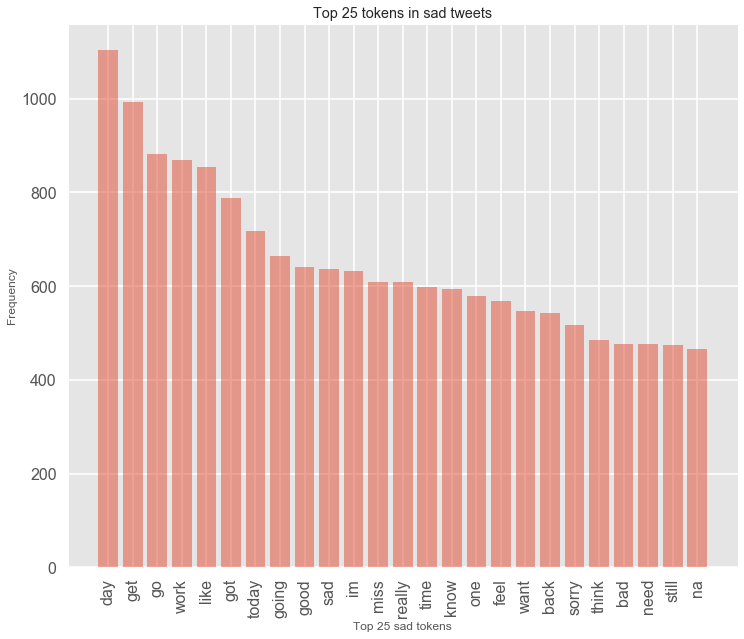

In [25]:
a = list(map(operator.itemgetter(1), dfRepCount[2]))
b = list(map(operator.itemgetter(0), dfRepCount[2]))

y_pos = np.arange(25)
plt.figure(figsize=(12,10))
plt.bar(y_pos, a, align='center', alpha=0.5)
plt.xticks(y_pos, b ,rotation='vertical')

plt.ylabel('Frequency')
plt.xlabel('Top 25 sad tokens')
plt.title('Top 25 tokens in sad tweets')

### Word Manipulation with Tokenization

In [26]:
from collections import Counter
from nltk.tokenize import word_tokenize


dfRep.Cleaned.apply(lambda x:Counter(t.lower() for t in word_tokenize(x)).most_common(10)).head(10)

0    [(know, 1), (was, 1), (listenin, 1), (to, 1), (bad, 1), (habit, 1), (earlier, 1), (and, 1), (started, 1), (freakin, 1)]
1                  [(layin, 1), (bed, 1), (with, 1), (headache, 1), (ughhhh, 1), (waitin, 1), (on, 1), (your, 1), (call, 1)]
2                                                                    [(funeral, 1), (ceremony, 1), (gloomy, 1), (friday, 1)]
3                                             [(wants, 1), (to, 1), (hang, 1), (out, 1), (with, 1), (friends, 1), (soon, 1)]
4         [(we, 1), (want, 1), (to, 1), (trade, 1), (with, 1), (someone, 1), (who, 1), (has, 1), (houston, 1), (tickets, 1)]
5                      [(did, 2), (not, 2), (my, 2), (re, 1), (pinging, 1), (why, 1), (you, 1), (go, 1), (to, 1), (prom, 1)]
6               [(but, 2), (he, 2), (should, 1), (be, 1), (sleep, 1), (im, 1), (not, 1), (thinking, 1), (about, 1), (an, 1)]
7                                                                                            [(hmmm, 1), (is, 1), (down, 1)]


In [27]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))

english_stops.add('http')

In [28]:
wordnet_lemmatizer=WordNetLemmatizer()

dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(5))

sentiment
happiness    [(day, 1990), (love, 1289), (good, 1276), (happy, 1156), (mother, 959)]
neutral                [(day, 474), (get, 436), (quot, 424), (go, 422), (work, 390)]
sadness               [(day, 1047), (get, 988), (go, 878), (work, 854), (like, 853)]
Name: content, dtype: object

In [29]:
X= np.array(dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(3)[0]).\
apply(lambda x: x[0]))


Y = np.array(dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(3)[0]).\
apply(lambda x: x[1]))

In [30]:
Xnew = []

for word,sentiment in zip(X, dfRep.groupby('sentiment').sentiment.count().index):
    Xnew.append(word+'_'+sentiment)
    
print(Xnew)

['day_happiness', 'day_neutral', 'day_sadness']


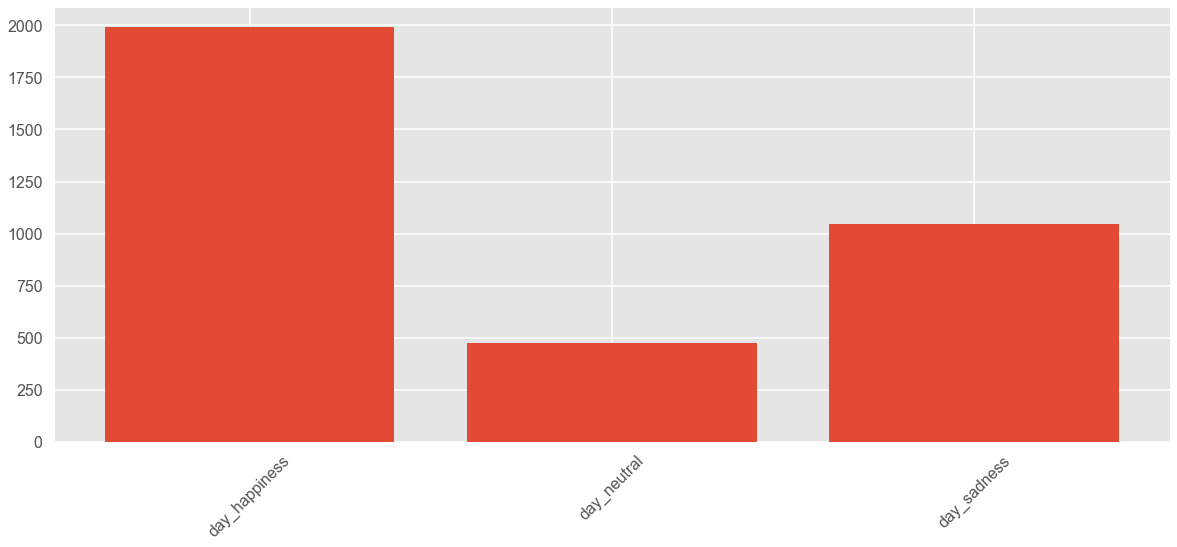

In [31]:
plt.subplots(figsize=(20,8))
plt.bar(Xnew,Y)
plt.xticks(rotation=45)
plt.show()

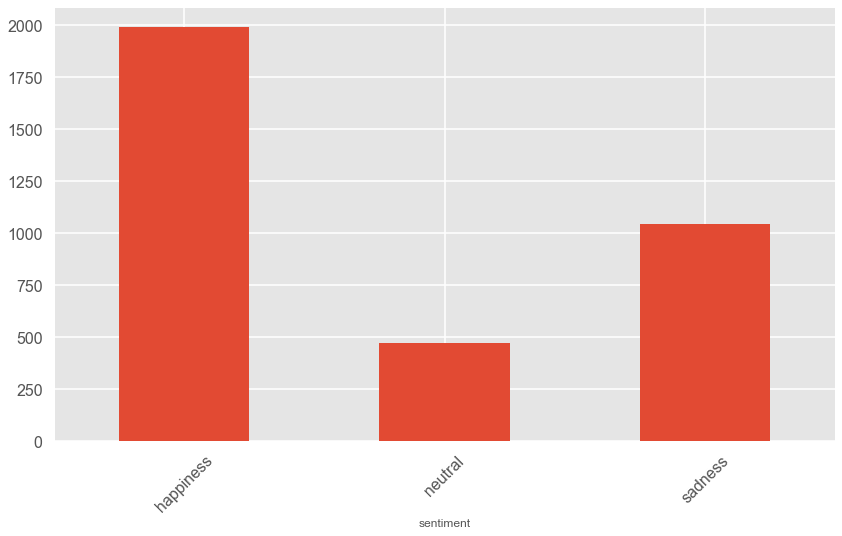

In [32]:
plt.subplots(figsize=(14,8))


dfRep.groupby('sentiment').content.apply(lambda x: ' '.join(x)).\
apply(lambda x: Counter([wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).most_common(3)[0]).\
apply(lambda x: x[1]).plot(kind='bar')

plt.xticks(rotation=45)
    
plt.show()

In [33]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))


df.head()
#dfRep['NewContent'] = 
'''
df.content.apply(lambda x: wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] 
                 if k not in english_stops])'''
# dfRep.head()

'\ndf.content.apply(lambda x: wordnet_lemmatizer.lemmatize(a) for a in \n                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] \n                                         if l.isalpha()] \n                 if k not in english_stops])'

In [34]:
dfRep['NewContent'] = dfRep.content.\
apply(lambda x: [wordnet_lemmatizer.lemmatize(a) for a in 
                            [k for k in [l for l in [t.lower() for t in word_tokenize(x)] 
                                         if l.isalpha()] if k not in english_stops]]).\
apply(lambda x: " ".join(x))

### Split the model

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfRep['NewContent'], dfRep['sentiment'],
                                                   test_size=25, random_state=53)

### CountVectorizing

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_train = cv.fit_transform(X_train)
cv_train = cv_train.toarray()
cv_test = cv.transform(X_test)
cv_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [37]:
vocab = cv.get_feature_names()
pd.DataFrame(cv_train, columns=vocab).head()

,aa,aaa,aaaa,aaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,aaaaaahhhhhhhh,aaaaaawwwesome,aaaaahhhh,aaaaall,aaaaand,aaaaaoouoouoouu,aaaaarrrrggghhh,aaaaaw,aaaaawwwwwww,aaaagggessss,aaaagh,aaaah,aaaahh,aaaahhhh,aaaaiieee,aaaale,aaaargh,aaaau,aaaaw,aaaawww,aaaawwww,aaah,aaahaha,aaahh,aaahhh,aaahhhh,aaalisson,aaand,aaargh,aaarrrgggghhh,aaarrrggghhh,aaarrrgh,aaauuuggghhh,aaaw,aaaww,aaawww,aac,aaggh,aah,aahh,aahhg,aahhh,aahhhh,aanddfilms,aanneeb,aannndd,aannniieee,aapko,aaraddict,aarg,aargh,aaron,aaronbishop,aaronhoskins,aaronlhb,aaronmarshmusic,aaronmbaer,aaronob,aaronovitch,aaronstewart,aaronwarner,aarrgghh,aasahan,aatw,aawh,aawww,aayushsoni,ab,aba,ababa,abaggy,abalone,abandon,abandoned,abandoning,abandonment,abang,abans,abba,abbefied,abbey,abbeyemm,abbie,abbreviate,abbreviation,abbster,abby,abbybradz,abbyhangsi,abbyjanky,abbyluvsaj,abbyro,abc,abcddesigns,abcdude,abducted,abduzeedo,abduzzeedo,abeen,abeerak,abeerforbill,abelpetsupply,aber,aberdeen,abguerraartist,abhi,abhor,abhorredlife,abhorrentbm,abi,abiban,abiding,abies,abiface,abigaildsouza,abigvictory,ability,abit,able,abledragon,ableton,abnormal,aboard,abomination,aboresearch,abougu,abounds,aboutk,aboutlittlerock,abouts,abouttttto,aboutvetmed,aboveallfabric,abp,abraham,abrams,abramsandbettes,abroad,absence,...,zahedan,zaida,zaina,zak,zaktar,zammi,zammo,zampeachie,zane,zanelle,zanelowe,zaneology,zanidia,zanylikethat,zanzoon,zap,zapatos,zappa,zaragreen,zarigee,zarlana,zaroi,zavaroni,zbrush,zd,zdaefron,zdf,ze,zealand,zeb,zebra,zedomaxbiz,zedshaw,zee,zeeble,zeemalmer,zeenabobeena,zeenell,zef,zefrank,zeitgeist,zeke,zekemurphy,zelciia,zelda,zeldman,zelenka,zelenski,zemote,zend,zendoc,zenh,zenithus,zenjar,zensify,zepinklady,zeralyn,zero,zeta,zhayrar,zhenerak,zhighlife,zhonguoren,zhundred,zi,zic,ziggy,zilch,zimbabwe,zimmer,zimmermann,zincroof,zindaret,zindelayentl,zingtoh,zion,zionxpress,zip,zipcode,zippys,zipvojames,zipz,zirconcode,zit,zjelektra,znatrainer,zo,zoe,zoeatthedisco,zoecorkhill,zoelovesarchie,zoexander,zoey,zoidberg,zoids,zoita,zojuist,zokathepuppy,zomberellamcfox,zombie,zombienicholas,zombiepix,zomg,zommgg,zone,zoned,zongzi,zoo,zooeyde,zoombezi,zoomed,zoopedup,zoozoo,zopfliesejule,zoriancrx,zotz,zouljiin,zownder,zoziekins,zq,zrhero,zsafwan,zsg,ztnewetnorb,zu,zuccini,zulu,zum,zumba,zune,zuppalizzle,zur,zurieventsllc,zurplemoon,zuzu,zwaloo,zwarte,zwriter,zydrate,zykloid,zyote,zyrtec,zzerbe,zzwhitejd,zzybug,zzz,zzzz,zzzzy,zzzzzzz,zzzzzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Tf-idf Vectorization

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_train = tv.fit_transform(X_train)
tv_train = tv_train.toarray()
tv_test = tv.transform(X_test)

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_train, 2), columns=vocab).head()

,aa,aaa,aaaa,aaaaa,aaaaaaaa,aaaaaaaaaaa,aaaaaaaaaahhhhhhhh,aaaaaaaaaamazing,aaaaaaaafternoon,aaaaaaaahhhhhhhh,aaaaaah,aaaaaahhhhhhhh,aaaaaawwwesome,aaaaahhhh,aaaaall,aaaaand,aaaaaoouoouoouu,aaaaarrrrggghhh,aaaaaw,aaaaawwwwwww,aaaagggessss,aaaagh,aaaah,aaaahh,aaaahhhh,aaaaiieee,aaaale,aaaargh,aaaau,aaaaw,aaaawww,aaaawwww,aaah,aaahaha,aaahh,aaahhh,aaahhhh,aaalisson,aaand,aaargh,aaarrrgggghhh,aaarrrggghhh,aaarrrgh,aaauuuggghhh,aaaw,aaaww,aaawww,aac,aaggh,aah,aahh,aahhg,aahhh,aahhhh,aanddfilms,aanneeb,aannndd,aannniieee,aapko,aaraddict,aarg,aargh,aaron,aaronbishop,aaronhoskins,aaronlhb,aaronmarshmusic,aaronmbaer,aaronob,aaronovitch,aaronstewart,aaronwarner,aarrgghh,aasahan,aatw,aawh,aawww,aayushsoni,ab,aba,ababa,abaggy,abalone,abandon,abandoned,abandoning,abandonment,abang,abans,abba,abbefied,abbey,abbeyemm,abbie,abbreviate,abbreviation,abbster,abby,abbybradz,abbyhangsi,abbyjanky,abbyluvsaj,abbyro,abc,abcddesigns,abcdude,abducted,abduzeedo,abduzzeedo,abeen,abeerak,abeerforbill,abelpetsupply,aber,aberdeen,abguerraartist,abhi,abhor,abhorredlife,abhorrentbm,abi,abiban,abiding,abies,abiface,abigaildsouza,abigvictory,ability,abit,able,abledragon,ableton,abnormal,aboard,abomination,aboresearch,abougu,abounds,aboutk,aboutlittlerock,abouts,abouttttto,aboutvetmed,aboveallfabric,abp,abraham,abrams,abramsandbettes,abroad,absence,...,zahedan,zaida,zaina,zak,zaktar,zammi,zammo,zampeachie,zane,zanelle,zanelowe,zaneology,zanidia,zanylikethat,zanzoon,zap,zapatos,zappa,zaragreen,zarigee,zarlana,zaroi,zavaroni,zbrush,zd,zdaefron,zdf,ze,zealand,zeb,zebra,zedomaxbiz,zedshaw,zee,zeeble,zeemalmer,zeenabobeena,zeenell,zef,zefrank,zeitgeist,zeke,zekemurphy,zelciia,zelda,zeldman,zelenka,zelenski,zemote,zend,zendoc,zenh,zenithus,zenjar,zensify,zepinklady,zeralyn,zero,zeta,zhayrar,zhenerak,zhighlife,zhonguoren,zhundred,zi,zic,ziggy,zilch,zimbabwe,zimmer,zimmermann,zincroof,zindaret,zindelayentl,zingtoh,zion,zionxpress,zip,zipcode,zippys,zipvojames,zipz,zirconcode,zit,zjelektra,znatrainer,zo,zoe,zoeatthedisco,zoecorkhill,zoelovesarchie,zoexander,zoey,zoidberg,zoids,zoita,zojuist,zokathepuppy,zomberellamcfox,zombie,zombienicholas,zombiepix,zomg,zommgg,zone,zoned,zongzi,zoo,zooeyde,zoombezi,zoomed,zoopedup,zoozoo,zopfliesejule,zoriancrx,zotz,zouljiin,zownder,zoziekins,zq,zrhero,zsafwan,zsg,ztnewetnorb,zu,zuccini,zulu,zum,zumba,zune,zuppalizzle,zur,zurieventsllc,zurplemoon,zuzu,zwaloo,zwarte,zwriter,zydrate,zykloid,zyote,zyrtec,zzerbe,zzwhitejd,zzybug,zzz,zzzz,zzzzy,zzzzzzz,zzzzzzzzzzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Cosine Similarity

In [ ]:
'''from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_train)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df'''

### Topic Modeling

In [39]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=3, max_iter=100, random_state=0)
dt_train = lda.fit_transform(cv_train)
dt_test = lda.transform(cv_test)

features = pd.DataFrame(dt_train, columns=['T1', 'T2', 'T3'])
features

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,T1,T2,T3
0,0.048138,0.718174,0.233688
1,0.827474,0.084445,0.088082
2,0.159834,0.642611,0.197555
3,0.444380,0.111163,0.444457
4,0.346908,0.067319,0.585773
5,0.102792,0.724792,0.172416
6,0.563749,0.380547,0.055703
7,0.937613,0.030682,0.031705
8,0.863505,0.067061,0.069435
9,0.832723,0.083664,0.083613


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


logreg = LogisticRegression(random_state=0)

logreg.fit(dt_train, y_train)

pred = logreg.predict(dt_test)

metrics.accuracy_score(pred, y_test)

0.47999999999999998

In [42]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

Rf.fit(dt_train, y_train)

pred= Rf.predict(dt_test)

metrics.accuracy_score(pred, y_test)

0.64000000000000001

## Modeling starts here

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train.values)

count_test = count_vectorizer.transform(X_test.values)

### Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

metrics.accuracy_score(y_test, pred)

0.56000000000000005

In [76]:
metrics.confusion_matrix(y_test, pred)

array([[5, 0, 1],
       [3, 0, 2],
       [5, 0, 9]])

### Tfidf Vectorizer

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='latin-1', 
                                   stop_words = 'english', min_df=5, ngram_range=(1, 3), norm='l2')

tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [95]:
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

from sklearn.feature_extraction.text import HashingVectorizer

hash_vectorizer = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     non_negative=True, norm=None, binary=False,
                                                     ngram_range=(1, 3))

hash_train = hash_vectorizer.fit_transform(X_train.values)

hash_test = hash_vectorizer.transform(X_test.values)

/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


### Naive Bayes with Tfidf Vectorize

In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifierTf = MultinomialNB()

nb_classifierTf.fit(tfidf_train, y_train)

pred = nb_classifierTf.predict(tfidf_test)

metrics.accuracy_score(y_test, pred)

0.56000000000000005

#### Naive Bayes Parameter Tuning

In [80]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifierTf = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifierTf.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifierTf.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

In [81]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.56

Alpha:  

/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.1
Score:  0.56

Alpha:  0.2
Score:  0.56

Alpha:  0.3
Score:  0.56

Alpha:  0.4
Score:  0.56

Alpha:  0.5
Score:  0.52

Alpha:  0.6
Score:  0.52

Alpha:  0.7
Score:  0.52

Alpha:  0.8
Score:  0.52

Alpha:  0.9
Score:  0.52



In [82]:
#Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])


happiness [(-11.861022725544034, 'aaaah'), (-11.861022725544034, 'aaron'), (-11.861022725544034, 'abandoned'), (-11.861022725544034, 'abby'), (-11.861022725544034, 'ability'), (-11.861022725544034, 'able'), (-11.861022725544034, 'able make'), (-11.861022725544034, 'able talk'), (-11.861022725544034, 'absolutely love'), (-11.861022725544034, 'ac'), (-11.861022725544034, 'acc'), (-11.861022725544034, 'accent'), (-11.861022725544034, 'accept'), (-11.861022725544034, 'accepted'), (-11.861022725544034, 'accidentally'), (-11.861022725544034, 'according'), (-11.861022725544034, 'account'), (-11.861022725544034, 'ace cake'), (-11.861022725544034, 'ach'), (-11.861022725544034, 'ache')]
neutral [(-7.2760552468734616, 'going bed'), (-7.2360499122597632, 'jr'), (-7.2360499122597632, 'tesco'), (-7.2070623753865108, 'love song'), (-7.1514925242317, 'audition'), (-7.1160905971807837, 'invitation'), (-7.0988487907462776, 'hk'), (-7.0407411599389969, 'gorgeous day'), (-6.9337690403868288, 'good fun'), 

### Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

Rf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)

Rf.fit(tfidf_train, y_train)

pred= Rf.predict(tfidf_test)

metrics.accuracy_score(pred, y_test)

0.64000000000000001

### Gradient Boosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=200)
# fit the training data
gbc.fit (tfidf_train, y_train)
# get the predicted values from the test set
predicted = gbc.predict(tfidf_test)

metrics.accuracy_score(predicted, y_test)

0.59999999999999998

### Linear SVC

In [85]:
from sklearn.svm import LinearSVC

Lsvc = LinearSVC()

Lsvc.fit(tfidf_train, y_train)

pred= Lsvc.predict(tfidf_test)

metrics.accuracy_score(pred,y_test)

0.56000000000000005

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=0)

logreg.fit(tfidf_train, y_train)

pred = logreg.predict(tfidf_test)

metrics.accuracy_score(pred, y_test)

0.56000000000000005

### Confusion Matrix Visualization

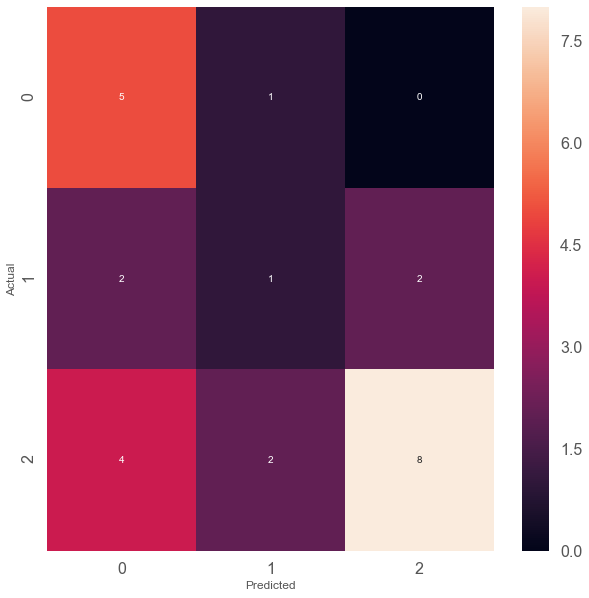

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_mat = metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Logistic Regression over OneVsRestClassifier

In [88]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression())

clf.fit(tfidf_train, y_train)

pred= clf.predict(tfidf_test)

metrics.accuracy_score(pred,y_test)

0.56000000000000005

In [96]:
clfHash = OneVsRestClassifier(LogisticRegression())

clfHash.fit(hash_train, y_train)

pred= clfHash.predict(hash_test)

metrics.accuracy_score(pred,y_test)

0.64000000000000001

### Using nltk's Tweet Tokenizer

In [98]:
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

dfRep['content2'] = df['content'].apply(lambda x: ' '.join(tknzr.tokenize(x)))

dfRep.head()

,tweet_id,sentiment,author,content,preCleaningLen,Cleaned,NewContent,content2
0,1956967341,neutral,xoshayzers,@tiffanylue i know i was listenin to bad habi...,92,know was listenin to bad habit earlier and sta...,tiffanylue know listenin bad habit earlier sta...,i know i was listenin to bad habit earlier and...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,60,layin bed with headache ughhhh waitin on your ...,layin n bed headache ughhhh waitin call,Layin n bed with a headache ughhh ... waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,35,funeral ceremony gloomy friday,funeral ceremony gloomy friday,Funeral ceremony ... gloomy friday ...
3,1956967789,happiness,czareaquino,wants to hang out with friends SOON!,36,wants to hang out with friends soon,want hang friend soon,wants to hang out with friends SOON !
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,86,we want to trade with someone who has houston ...,dannycastillo want trade someone houston ticke...,We want to trade with someone who has Houston ...


In [99]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(dfRep['content2'], dfRep['sentiment'],
                                                   test_size=.33, random_state=53)

In [100]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train2.values)

count_test = count_vectorizer.transform(X_test2.values)

### Naive Bayes on Tweet Tokenize

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()

nb_classifier.fit(count_train, y_train2)

pred = nb_classifier.predict(count_test)

metrics.accuracy_score(y_test2, pred)

0.55500000000000005

### OneVsRestClassifier on LogisticRegression with TweetTokenizer

In [102]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

clf = OneVsRestClassifier(LogisticRegression())

clf.fit(count_train, y_train2)

pred= clf.predict(count_test)

metrics.accuracy_score(pred,y_test2)

0.5740909090909091

### Deep Learning on Twitter Analysis

In [105]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(dfRep.NewContent)

print(tokenizer.word_index)

Using TensorFlow backend.


{'day': 1, 'good': 2, 'get': 3, 'like': 4, 'go': 5, 'quot': 6, 'got': 7, 'http': 8, 'love': 9, 'work': 10, 'u': 11, 'today': 12, 'going': 13, 'time': 14, 'one': 15, 'happy': 16, 'lol': 17, 'know': 18, 'back': 19, 'really': 20, 'im': 21, 'mother': 22, 'see': 23, 'want': 24, 'amp': 25, 'ca': 26, 'night': 27, 'think': 28, 'new': 29, 'home': 30, 'well': 31, 'thanks': 32, 'na': 33, 'oh': 34, 'still': 35, 'much': 36, 'need': 37, 'miss': 38, 'feel': 39, 'last': 40, 'great': 41, 'make': 42, 'hope': 43, 'morning': 44, 'would': 45, 'twitter': 46, 'haha': 47, 'wish': 48, 'fun': 49, 'week': 50, 'tomorrow': 51, 'could': 52, 'sad': 53, 'tonight': 54, 'thing': 55, 'sorry': 56, 'bad': 57, 'friend': 58, 'right': 59, 'look': 60, 'come': 61, 'nice': 62, 'gon': 63, 'mom': 64, 'though': 65, 'better': 66, 'say': 67, 'way': 68, 'yeah': 69, 'sleep': 70, 'weekend': 71, 'getting': 72, 'people': 73, 'hate': 74, 'bed': 75, 'hour': 76, 'next': 77, 'school': 78, 'guy': 79, 'show': 80, 'lt': 81, 'dont': 82, 'watchin

In [106]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(dfRep.NewContent)
X = pad_sequences(X)
print(X)

[[   0    0    0 ...,  464  959  350]
 [   0    0    0 ...,  288 1938  163]
 [   0    0    0 ..., 1939 1475  130]
 ..., 
 [   0    0    0 ...,   96  157    1]
 [   0    0    0 ..., 1061   11  254]
 [   0    0    0 ..., 1737  212  773]]


In [107]:
import numpy as np 

Y = []
for val in dfRep.sentiment:
    if(val == 'happiness'):
        Y.append([1,0])
    else:
        Y.append([0,1])
Y = np.array(Y)
print(Y)

[[0 1]
 [0 1]
 [0 1]
 ..., 
 [1 0]
 [1 0]
 [1 0]]


In [108]:
from sklearn.model_selection import train_test_split


X_tr, X_ts, y_tr, y_ts = train_test_split(X,Y,test_size=0.2)

### This model is on 2 sentiments 'happy' and 'others'

In [109]:
import keras 
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential

model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, dropout=0.2, recurrent_dropout=0.2)`
  import sys


In [110]:
model.fit(X_tr ,y_tr,epochs=10,verbose=2,batch_size=32)


Epoch 1/10
 - 94s - loss: 0.5770 - acc: 0.7068
Epoch 2/10
 - 94s - loss: 0.5315 - acc: 0.7429
Epoch 3/10
 - 94s - loss: 0.5066 - acc: 0.7579
Epoch 4/10
 - 97s - loss: 0.4812 - acc: 0.7699
Epoch 5/10
 - 102s - loss: 0.4527 - acc: 0.7873
Epoch 6/10
 - 104s - loss: 0.4231 - acc: 0.8020
Epoch 7/10
 - 100s - loss: 0.3921 - acc: 0.8182
Epoch 8/10
 - 96s - loss: 0.3633 - acc: 0.8317
Epoch 9/10
 - 102s - loss: 0.3343 - acc: 0.8463
Epoch 10/10
 - 109s - loss: 0.3060 - acc: 0.8615


In [111]:
print(model.evaluate(X_ts,y_ts)[1])


8000/8000 [==============================] - 8s 938us/step
0.670875


In [113]:
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(dfRep.NewContent)

print(tokenizer.word_index)

{'day': 1, 'good': 2, 'get': 3, 'like': 4, 'go': 5, 'quot': 6, 'got': 7, 'http': 8, 'love': 9, 'work': 10, 'u': 11, 'today': 12, 'going': 13, 'time': 14, 'one': 15, 'happy': 16, 'lol': 17, 'know': 18, 'back': 19, 'really': 20, 'im': 21, 'mother': 22, 'see': 23, 'want': 24, 'amp': 25, 'ca': 26, 'night': 27, 'think': 28, 'new': 29, 'home': 30, 'well': 31, 'thanks': 32, 'na': 33, 'oh': 34, 'still': 35, 'much': 36, 'need': 37, 'miss': 38, 'feel': 39, 'last': 40, 'great': 41, 'make': 42, 'hope': 43, 'morning': 44, 'would': 45, 'twitter': 46, 'haha': 47, 'wish': 48, 'fun': 49, 'week': 50, 'tomorrow': 51, 'could': 52, 'sad': 53, 'tonight': 54, 'thing': 55, 'sorry': 56, 'bad': 57, 'friend': 58, 'right': 59, 'look': 60, 'come': 61, 'nice': 62, 'gon': 63, 'mom': 64, 'though': 65, 'better': 66, 'say': 67, 'way': 68, 'yeah': 69, 'sleep': 70, 'weekend': 71, 'getting': 72, 'people': 73, 'hate': 74, 'bed': 75, 'hour': 76, 'next': 77, 'school': 78, 'guy': 79, 'show': 80, 'lt': 81, 'dont': 82, 'watchin

In [115]:
Xwith3 = tokenizer.texts_to_sequences(dfRep.NewContent)
Xwith3 = pad_sequences(Xwith3)
print(Xwith3)

[[   0    0    0 ...,  464  959  350]
 [   0    0    0 ...,  288 1938  163]
 [   0    0    0 ..., 1939 1475  130]
 ..., 
 [   0    0    0 ...,   96  157    1]
 [   0    0    0 ..., 1061   11  254]
 [   0    0    0 ..., 1737  212  773]]


In [116]:
Ywith3 = []
for val in dfRep.sentiment:
    if(val == 'happiness'):
        Ywith3.append([1,0,0])
    elif (val=='neutral'):
        Ywith3.append([0,1,0])
    else:
        Ywith3.append([0,0,1])
Ywith3 = np.array(Ywith3)
print(Ywith3)

[[0 1 0]
 [0 0 1]
 [0 0 1]
 ..., 
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [117]:
X_tr3, X_ts3, y_tr3, y_ts3 = train_test_split(Xwith3,Ywith3,test_size=0.2)

### For 3 feelings 'happy', 'sad', 'neutral'

In [118]:
model = Sequential()
model.add(Embedding(2500,128,input_length=X.shape[1],dropout=0.2))
model.add(LSTM(300, dropout_U=0.2,dropout_W=0.2))
model.add(Dense(3,activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(300, dropout=0.2, recurrent_dropout=0.2)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
model.fit(X_tr3 ,y_tr3, epochs=5,verbose=2,batch_size=32)


Epoch 1/5
 - 99s - loss: 0.9426 - acc: 0.5572
Epoch 2/5
 - 106s - loss: 0.8696 - acc: 0.6085
Epoch 3/5
 - 108s - loss: 0.8388 - acc: 0.6265
Epoch 4/5
 - 95s - loss: 0.8070 - acc: 0.6443
Epoch 5/5
 - 100s - loss: 0.7705 - acc: 0.6632


In [120]:
print(model.evaluate(X_ts3,y_ts3)[1])

8000/8000 [==============================] - 8s 950us/step
0.582


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = ...
number_words = ...

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)